In [48]:
import pandas as pd

# Cleanup for Vera COVID dataset

POP_RES_1970 = '1970 resident population'
POP_JAIL_1983 = '1983 jail population'
POP_RES_1983 = '1983 resident population'
POP_JAIL_PRECOVID = 'Pre-COVID Jail Population'
COUNTY = 'County'
CHANGE = 'Change'
PERC_CHANGE  = 'Percentage Change'
DISPLAY = 'Display:'
INCARC_RATE = 'Jail Incarceration Rate Per 100K'
RATE_REDUCTION = 'Rate Reduction to Match Internatonal Norms'
REDUCTION_1983 = "Add'l Jail Reduction to Match  Pre-COVID Intn'l Avg"
BASELINE_DATE = 'Date of baseline count'
COVID_DATE = 'Date of covid data'
COUNT_DATE = 'Date of latest count'
LATEST_JAIL_POP = 'Jail Population (Latest)'
REPORT_JURIS = 'Reporting jurisdictions'
RES_POP = 'Resident population'
CASE_RATE_RES = 'Cases Per 100K Residents'
COVID_CASES = 'COVID-19 Cases'
DEATH_RATE_RES = 'Deaths Per 100K Residents'
COVID_DEATHS = 'COVID-19 Deaths'
FIPS = 'Fips' ## Does anyone know what FIPS means?
STATE = 'State'

vera_dtypes = {POP_RES_1970: 'Int64',
               POP_JAIL_1983: float, # For some reason, some values are float in this column
               POP_RES_1983: 'Int64',
               POP_JAIL_PRECOVID: 'Int64',
               COUNTY: str,
               CHANGE: 'Int64',
               PERC_CHANGE: float,
               DISPLAY: str,
               INCARC_RATE: float,
               RATE_REDUCTION: float,
               REDUCTION_1983: float,
               BASELINE_DATE: str,
               COVID_DATE: str,
               COUNT_DATE: str,
               LATEST_JAIL_POP: 'Int64',
               REPORT_JURIS: str,
               RES_POP: 'Int64',
               CASE_RATE_RES: 'Int64',
               COVID_CASES: 'Int64',
               DEATH_RATE_RES: 'Int64',
               COVID_DEATHS: 'Int64',
               FIPS: 'Int64'}

vera = pd.read_csv('../data/vera_covid.csv', usecols=list(vera_dtypes.keys()), dtype=vera_dtypes)
vera[BASELINE_DATE] = pd.to_datetime(vera[BASELINE_DATE], format='%m/%d/%Y')
vera[COVID_DATE] = pd.to_datetime(vera[COVID_DATE], format='%m/%d/%Y')
vera[COUNT_DATE] = pd.to_datetime(vera[COUNT_DATE], format='%m/%d/%Y')

vera[[COUNTY, STATE]] = pd.DataFrame(vera[COUNTY].str.split(',').to_list(), columns=[COUNTY, STATE])

In [47]:
# States with the highest jail incarceration rate per 100K (source: Vera Institute)

vera.groupby(STATE).sum()[[POP_JAIL_PRECOVID, INCARC_RATE]].sort_values(INCARC_RATE, ascending=False)[:10]

,Pre-COVID Jail Population,Jail Incarceration Rate Per 100K
STATE,,
Texas,66300,61634.621269
Kentucky,23210,53433.900154
Louisiana,23769,43459.155112
Virginia,11149,26027.065199
Indiana,5386,25439.442163
Mississippi,2458,8071.993710
Pennsylvania,15895,6252.357439
New York,14674,5208.202801
Florida,53656,4914.984319


In [65]:
# Cleanup for UCLA Confirmed Cases Dataset
FACILITY_TYPE = 'Facility'
FACILITY = 'County / Name of Facility'
STAFF_CASES = 'Confirmed Cases \n(Staff)'
RES_CASES = 'Confirmed Cases (Residents)'
STAFF_DEATHS = 'Confirmed Deaths\n(Staff)'
RES_DEATHS = 'Confirmed Deaths\n(Residents)'
STAFF_RECOVERED = 'Staff Recovered'
RES_RECOVERED = 'Residents Recovered'
UPDATED_DATE = 'Date \n(last updated)'
TOTAL_CASES = 'Total Cases'
TOTAL_DEATHS = 'Total Deaths'
TOTAL_RECOVERED = 'Total Recovered'

ucla_cases_dtypes = {FACILITY_TYPE: str,
                     STATE: str,
                     FACILITY: str,
                     STAFF_CASES: 'Int64',
                     RES_CASES: 'Int64',
                     STAFF_DEATHS: 'Int64',
                     RES_DEATHS: 'Int64',
                     STAFF_RECOVERED: 'Int64',
                     RES_RECOVERED: 'Int64',
                     UPDATED_DATE: str}

ucla_cases = pd.read_csv('../data/ucla_covid_cases.csv', skiprows=[1], usecols=list(ucla_cases_dtypes.keys()), dtype=ucla_cases_dtypes)
ucla_cases[UPDATED_DATE] = pd.to_datetime(ucla_cases[UPDATED_DATE], format='%m/%d/%y')
ucla_cases[TOTAL_CASES] = ucla_cases[[STAFF_CASES, RES_CASES]].sum(axis=1)
ucla_cases[TOTAL_DEATHS] = ucla_cases[[STAFF_DEATHS, RES_DEATHS]].sum(axis=1)
ucla_cases[TOTAL_RECOVERED] = ucla_cases[[STAFF_RECOVERED, RES_RECOVERED]].sum(axis=1)
ucla_cases.head()

,Facility,State,County / Name of Facility,Confirmed Cases \n(Staff),Confirmed Cases (Residents),Confirmed Deaths\n(Staff),Confirmed Deaths\n(Residents),Staff Recovered,Residents Recovered,Date \n(last updated),Total Cases,Total Deaths,Total Recovered
0,Prison,Alabama,State-Wide (for non-specific facilities),1,0,0,0,0,0,2020-05-02,1.0,0.0,0.0
1,Prison,Alabama,Alex City,0,0,0,0,0,0,2020-05-02,0.0,0.0,0.0
2,Prison,Alabama,ATEF,0,0,0,0,0,0,2020-05-02,0.0,0.0,0.0
3,Prison,Alabama,Bibb,0,1,0,0,0,0,2020-05-02,1.0,0.0,0.0
4,Prison,Alabama,Birmingham,0,0,0,0,0,0,2020-05-02,0.0,0.0,0.0


In [63]:
# List states with the highest number of cases
ucla_cases.groupby(STATE).sum()[[TOTAL_CASES, TOTAL_DEATHS, TOTAL_RECOVERED]].sort_values(TOTAL_CASES, ascending=False)[:10]

,Total Cases,Total Deaths,Total Recovered
State,,,
Ohio,4513.0,36.0,476.0
New York,3001.0,22.0,180.0
Texas,2665.0,23.0,212.0
Federal,2266.0,37.0,662.0
Michigan,2258.0,42.0,46.0
Tennessee,1778.0,0.0,0.0
California,1538.0,1.0,982.0
Illinois,1191.0,12.0,698.0
Arkansas,924.0,0.0,0.0


In [87]:
# Cleanup for Marshall Project COVID Data

NAME = 'name'
STAFF_TESTS = 'staff_tests'
PRISONER_TESTS = 'prisoner_tests'
TOTAL_STAFF_CASES = 'total_staff_cases'
TOTAL_RES_CASES = 'total_prisoner_cases'
TOTAL_STAFF_DEATHS = 'total_staff_deaths'
TOTAL_RES_DEATHS = 'total_prisoner_deaths'
REPORTED_DATE = 'as_of_date'
NOTES = 'notes'
TOTAL_TESTS = 'total_tests'

marshall_covid_dtypes = {NAME: str,
                         STAFF_TESTS: 'Int64',
                         PRISONER_TESTS: str,
                         TOTAL_STAFF_CASES: 'Int64',
                         TOTAL_RES_CASES: 'Int64',
                         TOTAL_STAFF_DEATHS: 'Int64',
                         TOTAL_RES_DEATHS: 'Int64',
                         REPORTED_DATE: str,
                         NOTES: str}

marshall_covid = pd.read_csv('../data/marshall_covid_cases.csv', usecols=list(marshall_covid_dtypes.keys()), dtype=marshall_covid_dtypes).rename(columns={NAME: STATE})
marshall_covid[PRISONER_TESTS] = pd.to_numeric(marshall_covid[PRISONER_TESTS], errors='coerce')
marshall_covid[REPORTED_DATE] = pd.to_datetime(marshall_covid[REPORTED_DATE], format='%Y-%m-%d')
marshall_covid[TOTAL_TESTS] = marshall_covid[[STAFF_TESTS,PRISONER_TESTS ]].sum(axis=1)
marshall_covid[TOTAL_CASES] = marshall_covid[[TOTAL_STAFF_CASES, TOTAL_RES_CASES]].sum(axis=1)
marshall_covid[TOTAL_DEATHS] = marshall_covid[[TOTAL_STAFF_DEATHS, TOTAL_RES_DEATHS]].sum(axis=1)
marshall_covid.head()

,State,staff_tests,prisoner_tests,total_staff_cases,total_prisoner_cases,total_staff_deaths,total_prisoner_deaths,as_of_date,notes,total_tests,Total Cases,Total Deaths
0,Alabama,NaN,78.0,13,4,0,1,2020-04-28,NaN,78.0,17.0,1.0
1,Alaska,NaN,211.0,NaN,1,NaN,NaN,2020-04-29,NaN,211.0,1.0,0.0
2,Arizona,NaN,210.0,NaN,50,NaN,2,2020-04-29,"Inmate deaths come from medical examiner, per ...",210.0,50.0,2.0
3,Arkansas,647,1855.0,95,923,0,0,2020-04-28,27 inmate tests with results pending and 25 fo...,2502.0,1018.0,0.0
4,California,NaN,1220.0,137,205,0,1,2020-04-29,NaN,1220.0,342.0,1.0


In [86]:
# Find earliest reported and latest reported date
print('Earliest Reported Date:\t', min(marshall_covid[REPORTED_DATE]))
print('Latest Reported Date:\t', max(marshall_covid[REPORTED_DATE]))

Earliest Reported Date:	 2020-03-24 00:00:00
Latest Reported Date:	 2020-04-30 00:00:00


In [117]:
# Find states with highest number of cases
top_cases = marshall_covid.groupby(STATE).max().sort_values(TOTAL_CASES, ascending=False)[:9].reset_index()
top_states = top_cases[STATE].to_list()
top_states

['Ohio',
 'Federal',
 'Michigan',
 'Texas',
 'New York',
 'Arkansas',
 'Tennessee',
 'Connecticut',
 'New Jersey']

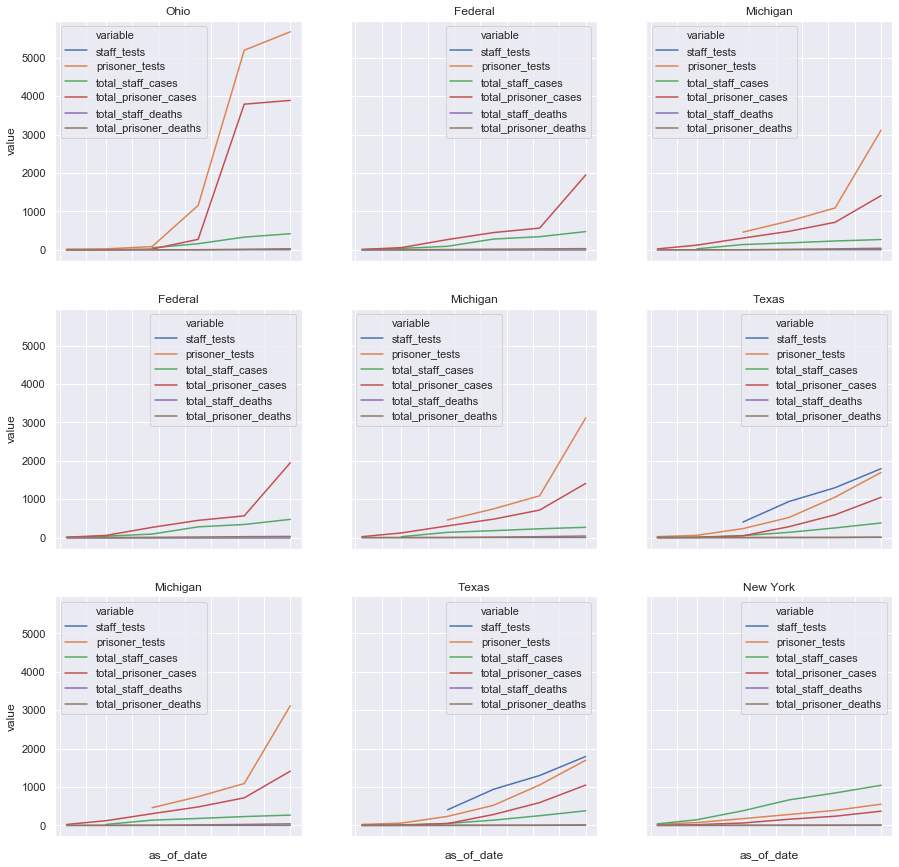

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(15, 15)})

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)


for x in range(0, 3):
    for y in range(0, 3):
        state = top_states[x + y]
        state_df = marshall_covid[marshall_covid[STATE] == state].melt(value_vars=[STAFF_TESTS, PRISONER_TESTS,TOTAL_STAFF_CASES, TOTAL_RES_CASES, TOTAL_STAFF_DEATHS, TOTAL_PRISONER_DEATHS], id_vars=[REPORTED_DATE])
        state_df['value'] = pd.to_numeric(state_df['value'])
        sns.lineplot(x=REPORTED_DATE, y='value', hue='variable', data=state_df, ax=axs[x, y])
        axs[x, y].set_title(state)
        axs[x, y].set_xticklabels(axs[x, y].get_xticklabels(), rotation=40, ha="right")
